# Problem Statement:
### Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

Model -- model of the car Price -- Offer Price in EUROs Age_08_04 -- Age in months as in August 2004 Mfg_Month -- Manufacturing month (1-12) Mfg_Year -- Manufacturing Year KM -- Accumulated Kilometers on odometer Fuel_Type -- Fuel Type (Petrol, Diesel, CNG) HP -- Horse Power Met_Color -- Metallic Color? (Yes=1, No=0) Color -- Color (Blue, Red, Grey, Silver, Black, etc.) Automatic -- Automatic ( (Yes=1, No=0) cc -- Cylinder Volume in cubic centimeters Doors -- Number of doors Cylinders -- Number of cylinders Gears -- Number of gear positions Quarterly_Tax -- Quarterly road tax in EUROs Weight -- Weight in Kilograms Mfr_Guarantee -- Within Manufacturer's Guarantee period (Yes=1, No=0) BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee (Yes=1, No=0) Guarantee_Period -- Guarantee period in months ABS -- Anti-Lock Brake System (Yes=1, No=0) Airbag_1 -- Driver_Airbag (Yes=1, No=0) Airbag_2 -- Passenger Airbag (Yes=1, No=0) Airco -- Airconditioning (Yes=1, No=0) Automatic_airco -- Automatic Airconditioning (Yes=1, No=0) Boardcomputer -- Boardcomputer (Yes=1, No=0) CD_Player -- CD Player (Yes=1, No=0) Central_Lock -- Central Lock (Yes=1, No=0) Powered_Windows -- Powered Windows (Yes=1, No=0) Power_Steering -- Power Steering (Yes=1, No=0) Radio -- Radio (Yes=1, No=0) Mistlamps -- Mistlamps (Yes=1, No=0) Sport_Model -- Sport Model (Yes=1, No=0) Backseat_Divider -- Backseat Divider (Yes=1, No=0) Metallic_Rim --Metallic Rim (Yes=1, No=0) Radio_cassette -- Radio Cassette (Yes=1, No=0) Tow_Bar -- Tow Bar (Yes=1, No=0)


In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading data
encodings = ["utf-8", "iso-8859-1", "cp1252"]

These encodings are used depending on the requirements of the text data being processed and the compatibility needs of the system or application. UTF-8 is often preferred for its versatility and ability to handle a wide range of characters from different languages, while ISO 8859-1 and CP1252 may be used in specific contexts where compatibility with legacy systems or specific character sets is required.

In [2]:
encodings = ["utf-8", "iso-8859-1", "cp1252"]
for encoding in encodings:
    try:
        data= pd.read_csv('ToyotaCorolla.csv', encoding=encoding)
        print(f"CSV file read successfully with {encoding} encoding.")
        break
    except UnicodeDecodeError:
        print(f"Failed to read CSV file with {encoding} encoding. Trying another encoding...")


Failed to read CSV file with utf-8 encoding. Trying another encoding...
CSV file read successfully with iso-8859-1 encoding.


In [3]:
data.head()  #it will show first 5rows

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# DATA EXPLORATION

In [4]:
data.shape

(1436, 38)

In [5]:
# Here we changing some columns names
selected_columns = ["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight", "Price"]
data = data[selected_columns]
data=data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data.head()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [6]:
data.head(5) #It will give first 5 rows

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [7]:
data.tail(5) # it will show last 5 rows

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250
1435,76,1,110,1600,5,5,19,1114,6950


In [8]:
data.sample(5)

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
579,46,33021,110,1600,5,5,85,1080,11900
750,61,80714,110,1600,5,5,85,1075,10450
879,62,61930,110,1600,4,5,69,1035,9950
542,52,46029,110,1600,4,5,69,1030,10500
1413,74,42317,107,1600,5,5,85,1100,8750


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     1436 non-null   int64
 1   KM      1436 non-null   int64
 2   HP      1436 non-null   int64
 3   CC      1436 non-null   int64
 4   Doors   1436 non-null   int64
 5   Gears   1436 non-null   int64
 6   QT      1436 non-null   int64
 7   Weight  1436 non-null   int64
 8   Price   1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [10]:
data.describe()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


In [11]:
data.nunique()

Age         77
KM        1263
HP          12
CC          13
Doors        4
Gears        4
QT          13
Weight      59
Price      236
dtype: int64

# DATA PREPROCESSING

### Identifying Null Values

In [12]:
data.isnull().sum()

Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
Price     0
dtype: int64

In [13]:
# There is no Null value in dataset

### Identifying Duplicates

In [14]:
data.duplicated().sum()

1

In [15]:
data[data.duplicated()]

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
113,8,13253,116,2000,5,5,234,1320,24950


In [16]:
data.drop_duplicates(keep='first', inplace=True)

In [17]:
data.reset_index(drop=True,inplace=True) # it will show values after dropping null values

In [18]:
data.shape

(1435, 9)

### Identifying Outliers

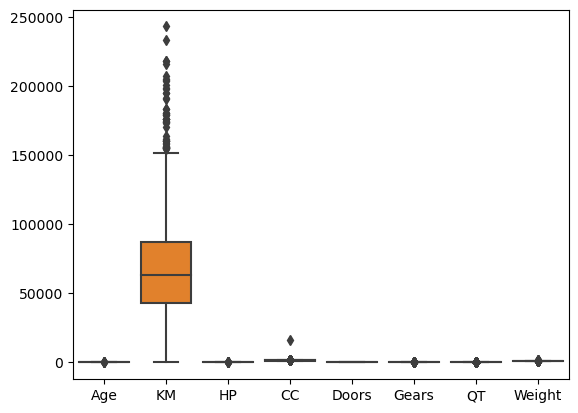

In [19]:
sns.boxplot(data=data.drop('Price',axis=1));

### Here we can see there are many outliers present in given dataset 

# DATA VISUALIZATION

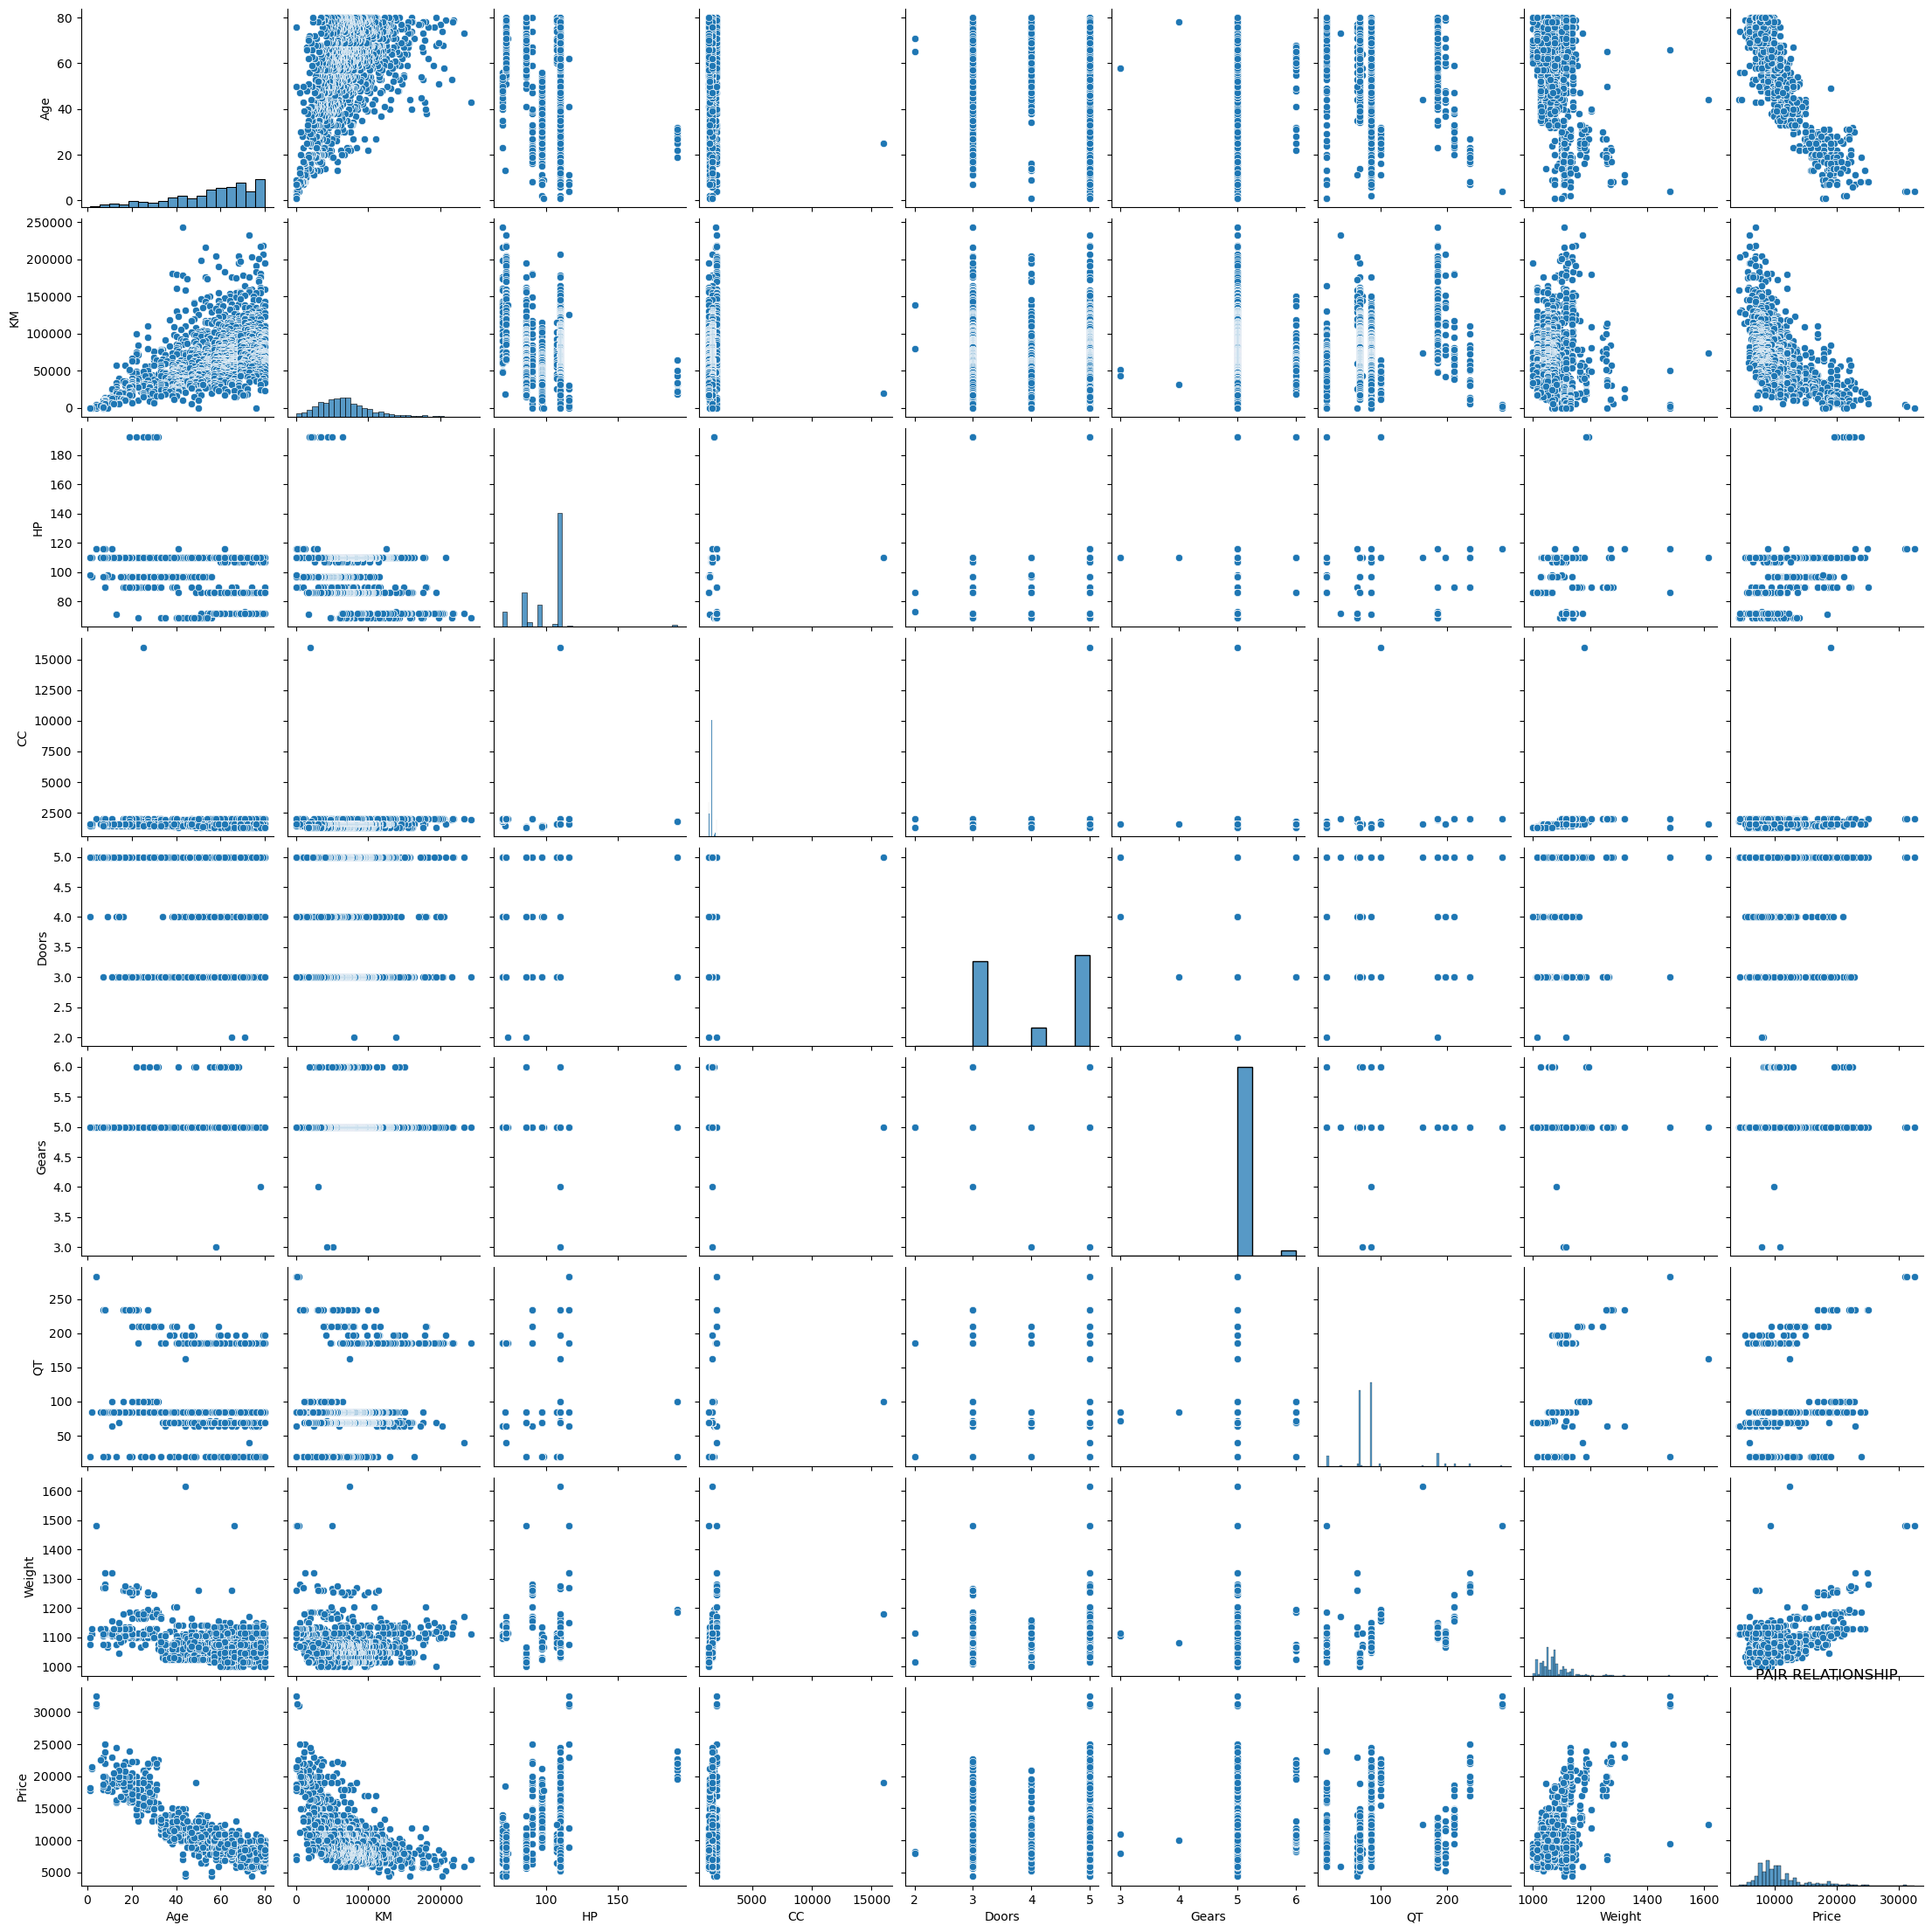

In [24]:
sns.pairplot(data)
plt.title("PAIR RELATIONSHIP")
plt.show()

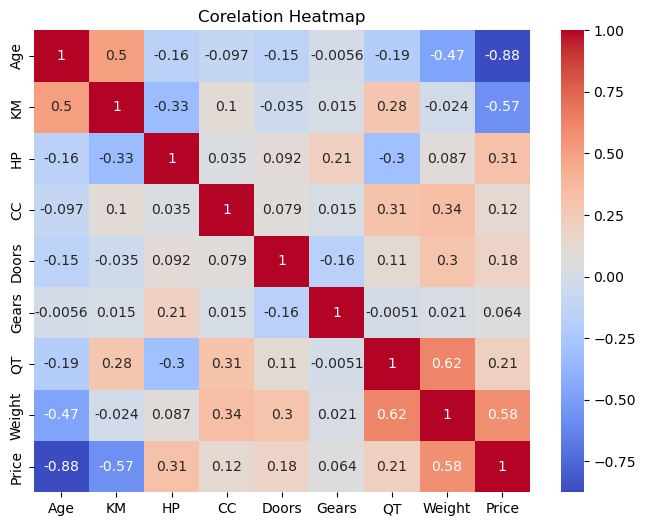

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True, cmap="coolwarm")
plt.title("Corelation Heatmap")
plt.show()

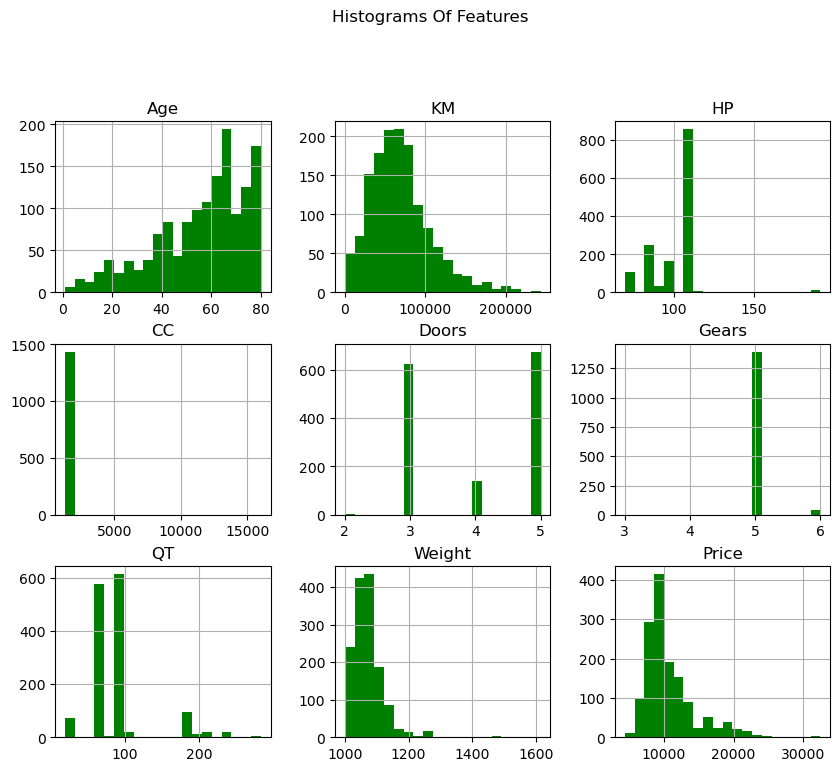

In [22]:
data.hist(bins=20,figsize=(10,8), color="green")
plt.suptitle("Histograms Of Features", y=1.02)
plt.show()

<Axes: xlabel='Price', ylabel='HP'>

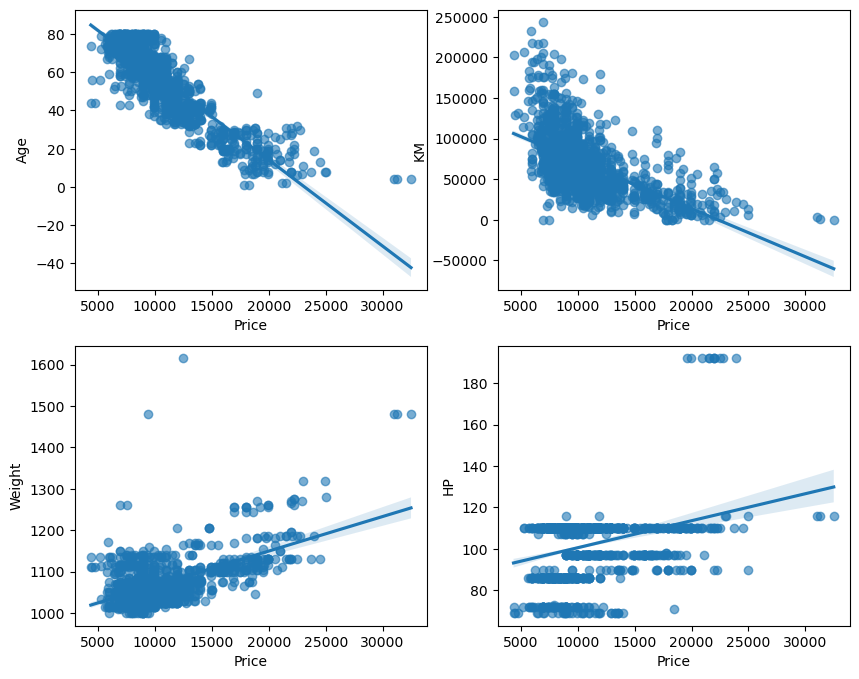

In [25]:
f, axes= plt.subplots(2,2,figsize=(10,8))

sns.regplot(x= 'Price', y= 'Age', data=data, scatter_kws={'alpha':0.6}, ax=axes[0,0])
sns.regplot(x='Price', y='KM', data=data, scatter_kws={'alpha':0.6}, ax=axes[0,1])
sns.regplot(x='Price', y='Weight',data=data, scatter_kws={'alpha':0.6},ax=axes[1,0])
sns.regplot(x='Price', y='HP',data=data,scatter_kws={'alpha':0.6},ax=axes[1,1])

In [28]:
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


In [29]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


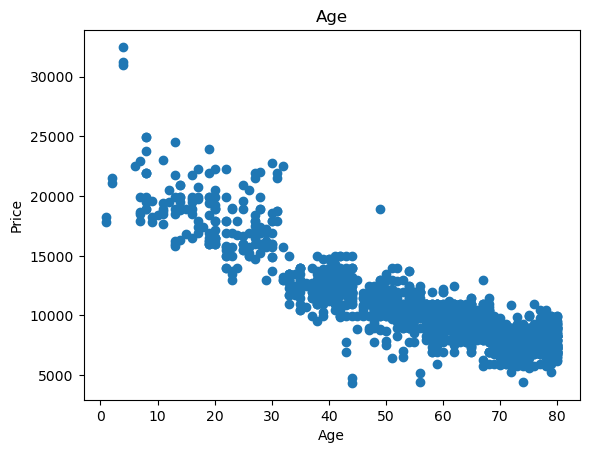

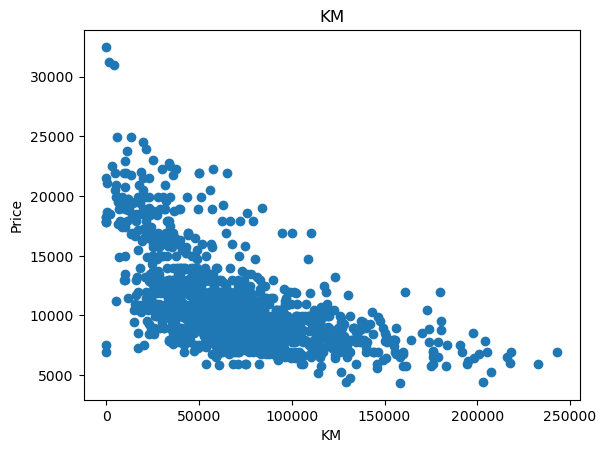

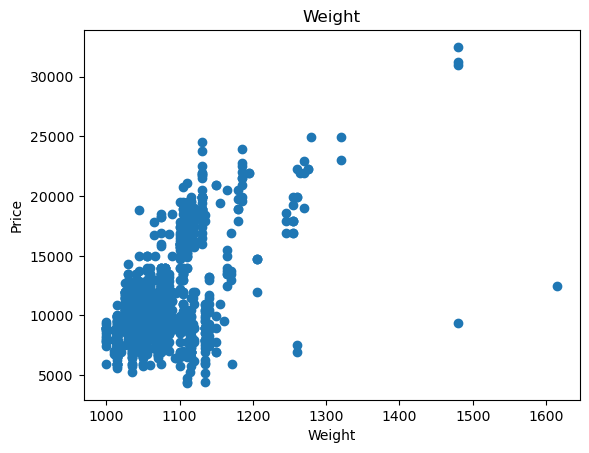

In [30]:
for feature in continuous_feature:
    if feature!="Price":
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

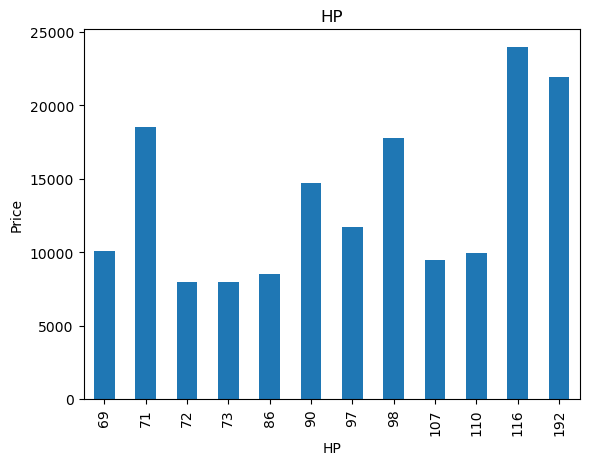

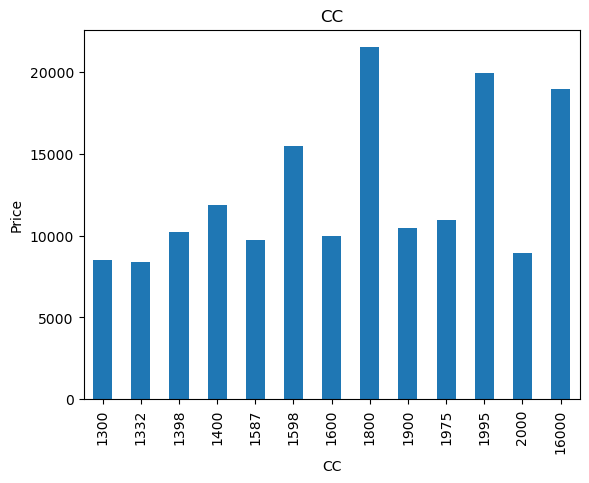

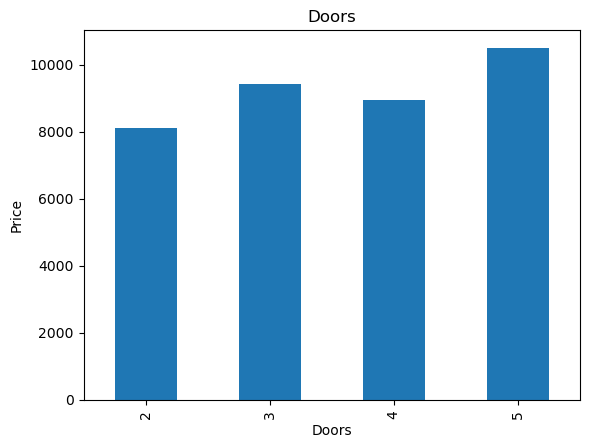

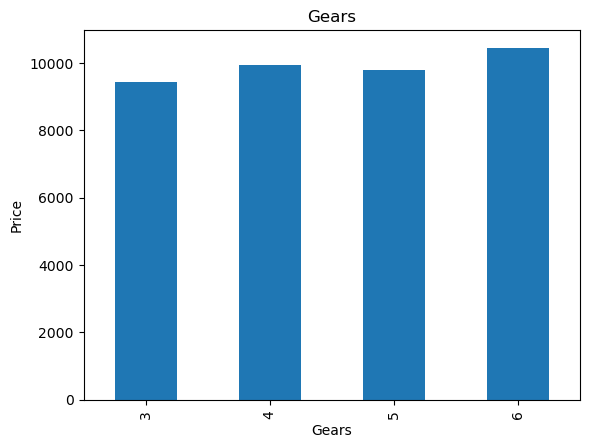

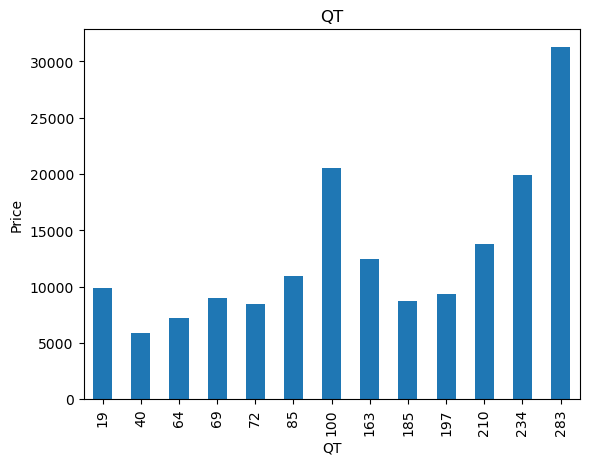

In [31]:
for feature in discrete_feature:
    data.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

### From above visulization we can see that the number of GEARS & DOORS in a car has little influnce 
### on price between the cars. Also this cause to price variation between the cars.

# DATA SPLITTING

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X=data.drop('Price', axis=1)
y=data['Price']
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2,random_state=42)

In [34]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (1148, 8)
Shape of X_test (287, 8)
Shape of y_train (1148,)
Shape of y_test (287,)


# FEATURE SCALING

In [35]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [36]:
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

# MODEL SELECTION

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model= LinearRegression()
model.fit(scaled_X_train,y_train)

LinearRegression()

In [39]:
y_pred=model.predict(scaled_X_test)

# MODEL EVALUATION

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [41]:
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
rmse= mean_squared_error(y_test,y_pred,squared=True)
r2=r2_score(y_test,y_pred)

In [42]:
print("mean absolute error(MAE):",mae)
print("mean squared error (MSE):",mse)
print("mean squared error(rmse):",rmse)
print("R-squared(R2):",r2)

mean absolute error(MAE): 979.7304734050325
mean squared error (MSE): 1875973.8616569457
mean squared error(rmse): 1875973.8616569457
R-squared(R2): 0.8436314958773413


# MODEL SELECTION: OLS

In [43]:
import statsmodels.api as stm

In [44]:
model=stm.OLS(y,X).fit()
predictions=model.predict(X)

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.245e+04
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        20:33:27   Log-Likelihood:                         -12374.
No. Observations:                1435   AIC:                                  2.476e+04
Df Residuals:                    1427   BIC:                                  2.481e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -125.4366      2.444    -51.332      0.000    -130.230    -120.643
KM            -0.0204      0.001    -16.239      0.000      -0.023      -0.018
HP            33.3304      2.795     11.925      0.000      27.848      38.813
CC            -0.1007      0.090     -1.114      0.265      -0.278       0.077
Doors         -6.3603     40.159     -0.158      0.874     -85.138      72.417
Gears         92.5332    148.382      0.624      0.533    -198.537     383.604
QT             5.6875      1.229      4.629      0.000       3.277       8.098
Weight        13.9761      0.773     18.081      0.000      12.460      15.492
==============================================================================
Omnibus:                      109.540   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.984
Skew:                           0.030   Prob(JB):                    6.24e-125
Kurtosis:                       6.092   Cond. No.                     3.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MULTICOLLINEARTY

### Finding COOK'S Distance

In [46]:
inf1=model.get_influence()

In [47]:
sum_data= inf1.summary_frame()

In [48]:
sum_data.sort_values('cooks_d',ascending=False)

,dfb_Age,dfb_KM,dfb_HP,dfb_CC,dfb_Doors,dfb_Gears,dfb_QT,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,-0.287213,-2.338772e+00,-2.772129,2.600592e+01,0.644975,9.124783e-01,-4.265825,-3.598188,8.153999e+01,7.633772,0.917992,25.540555,7.791853,26.069452
220,-0.253511,-2.144529e-02,0.170037,4.179101e-01,0.552787,1.569527e+00,0.547497,-1.686047,3.705074e-01,-6.126430,0.073192,-1.721644,-6.206448,-1.744131
959,-0.208003,3.842423e-02,0.441589,1.977091e-01,0.538733,9.935350e-01,0.783167,-1.261203,2.074678e-01,-4.094812,0.090070,-1.288310,-4.117639,-1.295492
109,0.105225,-3.011852e-01,0.119567,-1.942458e-01,-0.224095,-6.191548e-01,0.343401,0.569500,1.272359e-01,5.002263,0.039089,1.008904,5.044938,1.017511
600,-0.212757,3.193334e-01,0.383540,-1.100947e-01,0.404348,5.515317e-01,0.426138,-0.747833,9.669677e-02,-5.588608,0.024170,-0.879531,-5.648809,-0.889005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,0.000150,1.669291e-05,0.000127,2.853871e-05,0.000018,-3.168636e-05,0.000020,-0.000046,1.023153e-08,0.006055,0.002228,0.000286,0.006053,0.000286
1432,-0.000146,1.981292e-04,0.000111,1.291516e-05,0.000055,-3.930528e-05,-0.000027,-0.000012,7.995082e-09,-0.003154,0.006388,-0.000253,-0.003153,-0.000253
481,-0.000003,2.194602e-07,-0.000055,2.748044e-07,-0.000105,8.474484e-06,-0.000017,0.000030,3.510541e-09,-0.004154,0.001625,-0.000168,-0.004152,-0.000168
88,0.000057,-2.369949e-05,0.000015,1.400674e-05,0.000038,2.522483e-07,0.000027,-0.000027,7.975656e-10,-0.001038,0.005888,-0.000080,-0.001038,-0.000080


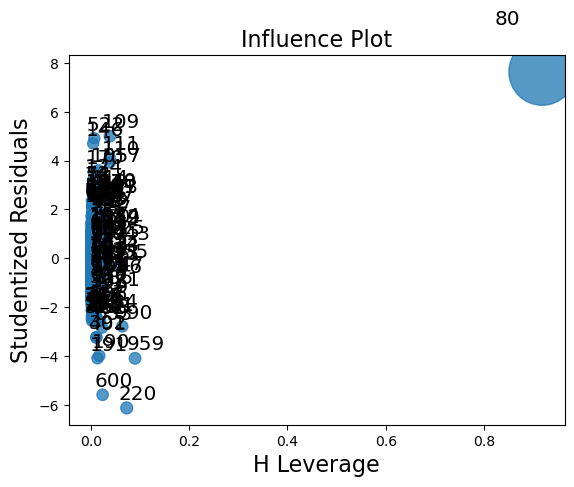

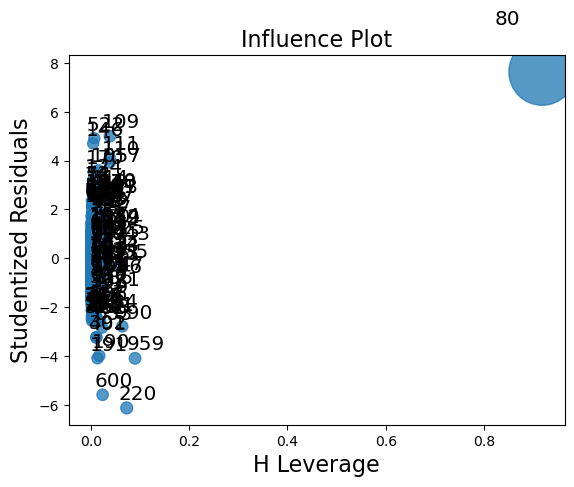

In [49]:
inf1.plot_influence()

###### Index 80 has highest Cook's Distance

In [50]:
data=data.drop(data.index[[80]],axis=0).reset_index()
data=data.drop(['index'],axis=1)
data.head()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


### Retrain Model

### DATA SPLIT

In [51]:
X= data.drop("Price", axis=1)
y=data["Price"]

In [52]:
model=stm.OLS(y,X).fit()
predictions=model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.295e+04
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        20:33:43   Log-Likelihood:                         -12336.
No. Observations:                1434   AIC:                                  2.469e+04
Df Residuals:                    1426   BIC:                                  2.473e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -124.7490      2.396    -52.073      0.000    -129.448    -120.050
KM            -0.0175      0.001    -13.636      0.000      -0.020      -0.015
HP            40.9212      2.906     14.080      0.000      35.220      46.623
CC            -2.4035      0.309     -7.790      0.000      -3.009      -1.798
Doors        -31.7366     39.479     -0.804      0.422    -109.180      45.707
Gears        -40.1153    146.365     -0.274      0.784    -327.229     246.999
QT            10.8227      1.372      7.886      0.000       8.131      13.515
Weight        16.7010      0.834     20.022      0.000      15.065      18.337
==============================================================================
Omnibus:                      146.503   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1073.519
Skew:                          -0.094   Prob(JB):                    7.73e-234
Kurtosis:                       7.235   Cond. No.                     3.29e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Finding variance inflation factor(VIF)

In [53]:
vif=pd.DataFrame()

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
vif["VIF Factor "]= [variance_inflation_factor(X.values,i) for i in  range(X.shape[1]) ]

In [56]:
vif["features"]=X.columns

In [57]:
vif.round(1)

,VIF Factor,features
0,16.4,Age
1,8.3,KM
2,73.0,HP
3,194.7,CC
4,22.0,Doors
5,445.4,Gears
6,14.3,QT
7,658.9,Weight


###### Our analysis reveals that Weight and Gears have a high variance inflation factor (VIF), 
###### indicating significant collinearity.
###### This suggests that these features share redundant information and may be capturing similar aspects of the data's variance.

###### To address this multicollinearity and potentially improve model performance, 
###### we may need to consider removing one of these features.

In [58]:
# Removed weight from the dataframe and tested model
df=data.drop("Weight",axis=1)

# RETRAIN MODEL

In [61]:
new_model= stm.OLS(y, df).fit()
new_predictions= new_model.predict(df)

In [62]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.687e+32
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        21:11:55   Log-Likelihood:                          34631.
No. Observations:                1434   AIC:                                 -6.925e+04
Df Residuals:                    1426   BIC:                                 -6.920e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age        -9.237e-14   2.32e-14     -3.978      0.000   -1.38e-13   -4.68e-14
KM         -7.676e-17   8.14e-18     -9.431      0.000   -9.27e-17   -6.08e-17
HP           6.75e-14   1.84e-14      3.677      0.000    3.15e-14    1.04e-13
CC           4.33e-15   1.65e-15      2.628      0.009     1.1e-15    7.56e-15
Doors       2.274e-13   2.21e-13      1.029      0.304   -2.06e-13    6.61e-13
Gears      -9.095e-13   5.88e-13     -1.546      0.122   -2.06e-12    2.45e-13
QT         -2.798e-14   8.34e-15     -3.353      0.001   -4.43e-14   -1.16e-14
Price          1.0000    1.4e-16   7.16e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       74.304   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.629
Skew:                          -0.489   Prob(JB):                     6.31e-22
Kurtosis:                       3.824   Cond. No.                     2.22e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# STANDARD SCALER

In [64]:
col_names= df.columns
features=df[col_names]

scaler=StandardScaler().fit(features.values)
features=scaler.transform(features.values)
df_standard_scaled=pd.DataFrame(features,columns=col_names)
df_standard_scaled.head()

,Age,KM,HP,CC,Doors,Gears,QT,Price
0,-1.779543,-0.576998,-0.766773,2.319462,-1.083747,-0.140525,3.002793,0.773094
1,-1.779543,0.115598,-0.766773,2.319462,-1.083747,-0.140525,3.002793,0.842496
2,-1.725621,-0.717781,-0.766773,2.319462,-1.083747,-0.140525,3.002793,0.898018
3,-1.617777,-0.549936,-0.766773,2.319462,-1.083747,-0.140525,3.002793,1.175628
4,-1.402088,-0.803478,-0.766773,2.319462,-1.083747,-0.140525,3.002793,0.842496


# RETRAIN MODEL

In [66]:
new_model=stm.OLS(y,df_standard_scaled).fit()
new_predictions=new_model.predict(df)

In [67]:
new_model.summary()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to c

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.102
Model:                            OLS   Adj. R-squared (uncentered):              0.096
Method:                 Least Squares   F-statistic:                              20.14
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                    4.63e-29
Time:                        21:19:40   Log-Likelihood:                         -15341.
No. Observations:                1434   AIC:                                  3.070e+04
Df Residuals:                    1426   BIC:                                  3.074e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -1.41e-11    615.731  -2.29e-14      1.000   -1207.836    1207.836
KM         -7.901e-12    415.975   -1.9e-14      1.000    -815.989     815.989
HP          2.444e-12    378.880   6.45e-15      1.000    -743.221     743.221
CC          -3.61e-12    435.071   -8.3e-15      1.000    -853.448     853.448
Doors      -3.212e-12    296.673  -1.08e-14      1.000    -581.962     581.962
Gears      -5.116e-13    298.514  -1.71e-15      1.000    -585.573     585.573
QT          9.308e-12    472.092   1.97e-14      1.000    -926.069     926.069
Price       3602.1796    705.680      5.105      0.000    2217.897    4986.462
==============================================================================
Omnibus:                      109.712   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.273
Skew:                           0.465   Prob(JB):                     2.02e-54
Kurtosis:                       4.809   Cond. No.                         5.13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R-squared had variance with respect to other transformations.